In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import json
import glob
import random
from btbench_config import *
from braintreebank_subject import Subject
from btbench_datasets import BrainTreebankSubjectTrialBenchmarkDataset
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'font_arial.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'

In [2]:
subject_id, trial_id = 3, 2
subject = Subject(subject_id, cache=False)
subject.load_neural_data(trial_id)
dataset = BrainTreebankSubjectTrialBenchmarkDataset(subject, trial_id, dtype=torch.float32, eval_name="rms") # eval_name can be "pitch", "rms", "onset", or "speech"
all_words_df = dataset.all_words_df

all_words_df["neural_data_time"] = all_words_df["est_idx"] / SAMPLING_RATE
all_words_df = all_words_df[['text', 'start', 'rms', 'pitch', 'max_mean_pixel_brightness', 'face_num', 'neural_data_time']]
all_words_df = all_words_df.iloc[1049:1054]
all_words_df

,text,start,rms,pitch,max_mean_pixel_brightness,face_num,neural_data_time
1049,The,1298.190,0.033887,49.477501,33.194789,0.0,1482.999512
1050,horsemen,1298.271,0.030576,52.447266,33.164250,0.0,1483.081055
1051,took,1298.950,0.023497,62.408077,32.930059,0.0,1483.766113
1052,your,1299.230,0.027601,53.306385,32.802667,0.0,1484.041992
1053,lands,1299.381,0.021372,54.055378,32.711491,0.0,1484.187500


In [32]:
show_n_electrodes = 4
show_electrodes = np.random.choice(subject.electrode_labels, show_n_electrodes)

window_from = int(1482.6 * SAMPLING_RATE)
window_to = int(1484.5 * SAMPLING_RATE)

neural_data = []
for electrode_label in show_electrodes:
    neural_data.append(subject.get_electrode_data(electrode_label, trial_id, window_from=window_from, window_to=window_to))
neural_data = np.array(neural_data)

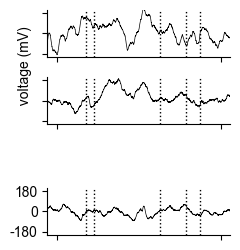

In [46]:
fig, axes = plt.subplots(show_n_electrodes, 1, figsize=(2.5, .65*show_n_electrodes), gridspec_kw={'height_ratios': [1, 1, 0.5, 1]})
time = np.arange(window_from, window_to) / SAMPLING_RATE

for i in range(show_n_electrodes):
    if i == 2:
        axes[i].axis('off')
        continue
    axes[i].plot(time, neural_data[i], linewidth=.5, color='black')
    axes[i].set_ylabel(f'')
    #axes[i].set_xlim(time[0], time[-1])
    axes[i].set_xlim(window_from/SAMPLING_RATE, window_to/SAMPLING_RATE)
    axes[i].set_ylim(-210, 210)
    axes[i].set_yticks([-180, 0, 180])
    axes[i].set_yticklabels([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(True)
    axes[i].spines['left'].set_visible(True)
    _percent_time = (window_to - window_from) * 0.05 / SAMPLING_RATE
    axes[i].set_xticks([window_from/SAMPLING_RATE+_percent_time, window_to/SAMPLING_RATE-_percent_time])
    axes[i].set_xticklabels([])
    # Add vertical lines for word onsets
    for _, row in all_words_df.iterrows():
        axes[i].axvline(x=row['neural_data_time'], color='black', linestyle=':', alpha=1, linewidth=1)

    if i == 1:
        axes[i].set_ylabel('                  voltage (mV)')

axes[-1].set_yticklabels([-180, 0, 180])
#axes[-1].set_xlabel('time (seconds)')



plt.tight_layout()
plt.savefig('figures/example_neural_data.pdf', bbox_inches='tight', dpi=300)

/tmp/ipykernel_64873/3635959557.py:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(min(all_words_df[feature]) - feature_range*0.3, max(all_words_df[feature]) + feature_range*0.3)
/tmp/ipykernel_64873/3635959557.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


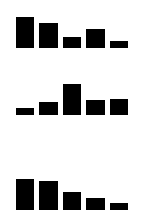

In [75]:
all_words_df

features = ['rms', 'pitch', 'face_num', 'max_mean_pixel_brightness']

fig, axes = plt.subplots(len(features), 1, figsize=(1.6, 2.6), gridspec_kw={'height_ratios': [1, 1, 0, 1], 'hspace': 1})

colors = ['black'] * len(features)
x_values = np.arange(len(all_words_df))

for i, (feature, ax) in enumerate(zip(features, axes)):
    # Plot bars
    ax.bar(x_values, all_words_df[feature], color=colors[i], width=0.8)
    
    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Only keep left and bottom spines
    ax.axis('off')
    feature_range = max(all_words_df[feature]) - min(all_words_df[feature])
    ax.set_ylim(min(all_words_df[feature]) - feature_range*0.3, max(all_words_df[feature]) + feature_range*0.3)
    # Set xlim to match the neural data plot
    #ax.set_xlim(window_from/SAMPLING_RATE, window_to/SAMPLING_RATE)

plt.tight_layout()
plt.savefig('figures/example_features.pdf', bbox_inches='tight', dpi=300)


,text,start,rms,pitch,max_mean_pixel_brightness,face_num,neural_data_time
5,I,48.870,0.015109,39.939552,10.839378,0.0,402.920410
6,have,48.991,0.010305,40.773945,10.839378,0.0,403.036133
7,a,49.041,0.011523,38.339630,10.839378,0.0,403.081543
8,flash,49.151,0.010336,34.789555,10.839378,0.0,403.201172
9,transmission,49.421,0.006652,37.837433,10.382943,0.0,403.463379
10,for,49.941,0.007906,38.468002,9.728037,0.0,403.982422
11,Agent,50.021,0.005959,37.857803,10.539612,0.0,404.080078
12,Finn,50.311,0.006056,42.520081,11.051584,0.0,404.361328
13,McMissile,50.450,0.007821,42.029625,11.721019,0.0,404.490723
